# Compelmentary analysis for the final project

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Importing data from 'ordsers_products_customers'
path = r'/Users/marialuciaguarita/Python Careerfoundry Project 1'
ords_prods_cust_merge = pd.read_pickle(os.path.join(path,'Data','Prepared Data','orders_products_customers.pkl'))

In [5]:
ords_prods_cust_merge_best = ords_prods_cust_merge

In [6]:
#Excluding Flag for low-activity customers
ords_prods_cust_merge_best.loc[ords_prods_cust_merge_best['max_order'] <=  5, 'exclusion_flag'] = 'Yes'


In [7]:
ords_prods_cust_merge_best.loc[ords_prods_cust_merge_best['max_order'] >  5, 'exclusion_flag'] = 'No'

In [8]:
ords_prods_cust_merge_best.drop(ords_prods_cust_merge_best[ords_prods_cust_merge_best['exclusion_flag']=='Yes'].index,inplace=True)

In [9]:
# Question 1 -   Number of orders placed at each day of the week

result = []

for value in ords_prods_cust_merge_best['orders_day_of_week']:
  if value == 0:
    result.append("Saturday")
  elif value == 1:
    result.append("Sunday")
  elif value == 2:
    result.append("Monday")
  elif value == 3:
    result.append("Tuesday")
  elif value == 4:
    result.append("Wednesday")
  elif value == 5:
    result.append("Thursday")
  elif value == 6:
    result.append("Friday")
  else:
    result.append("NaN")

In [10]:
ords_prods_cust_merge_best['Saturday'] = result
ords_prods_cust_merge_best['Saturday'].value_counts(dropna = False)

Saturday     5744325
Sunday       5278055
Friday       4175041
Thursday     3937100
Monday       3921025
Tuesday      3578050
Wednesday    3537828
Name: Saturday, dtype: int64

<AxesSubplot:>

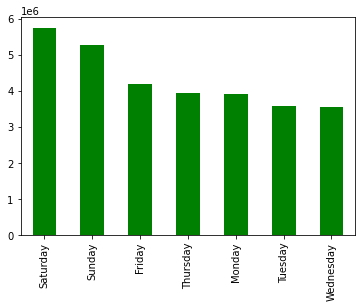

In [9]:
ords_prods_cust_merge_best['Saturday'].value_counts().plot.bar(color=['green'])

<AxesSubplot:>

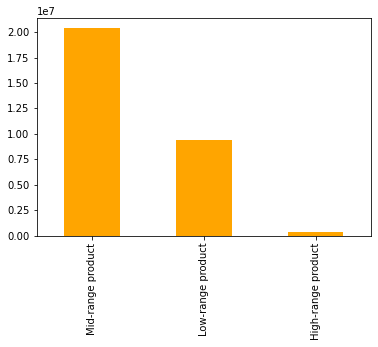

In [10]:
# Question 3 - Price Range Frequency
ords_prods_cust_merge_best['price_range_loc'].value_counts().plot.bar(color=['orange'])

In [3]:
# Question 5d - "Age x ordering habits"
ords_prods_cust_merge.loc[(ords_prods_cust_merge['age'] <= 35), 'age_range'] = 'youth'

In [4]:
ords_prods_cust_merge.loc[(ords_prods_cust_merge['age'] > 35) & (ords_prods_cust_merge['age'] < 65), 'age_range'] = 'middle age'

In [5]:
ords_prods_cust_merge.loc[(ords_prods_cust_merge['age'] >= 65), 'age_range'] = 'eldery'

In [6]:
ords_prods_cust_merge['age_range'].value_counts()

middle age    14683356
youth          9146419
eldery         8575084
Name: age_range, dtype: int64

In [7]:
pd.set_option("display.float_format",lambda x:"%.2f"% x)

In [8]:
ords_prods_cust_merge.groupby('age_range').agg({'prices': ['mean']})

,prices
,mean
age_range,
eldery,7.80
middle age,7.79
youth,7.79


In [9]:
ords_prods_cust_merge.groupby('age_range').agg({'days_since_prior_order': ['mean']})

,days_since_prior_order
,mean
age_range,
eldery,11.08
middle age,11.11
youth,11.12


In [18]:
# Question 5d - "Family status x ordering habits"
ords_prods_cust_merge.groupby('fam_status').agg({'prices': ['mean']})

,prices
,mean
fam_status,
divorced/widowed,7.80
living with parents and siblings,7.80
married,7.79
single,7.78


In [19]:
ords_prods_cust_merge.groupby('fam_status').agg({'days_since_prior_order': ['mean']})

,days_since_prior_order
,mean
fam_status,
divorced/widowed,10.57
living with parents and siblings,10.58
married,10.65
single,10.63


In [20]:
ords_prods_cust_merge['fam_status'].value_counts()

married                             21188130
single                               4961333
divorced/widowed                     2577880
living with parents and siblings     1444081
Name: fam_status, dtype: int64

In [22]:
# Question 5e - 'Income x family status'
ords_prods_cust_merge_best.groupby('fam_status').agg({'income': ['mean']})

,income
,mean
fam_status,
divorced/widowed,116069.73
living with parents and siblings,70934.93
married,101648.04
single,91674.45


In [13]:
#Creating a Dataframe with dawn orders 
ords_prods_cust_merge_best_AM = ords_prods_cust_merge_best.copy()
ords_prods_cust_merge_best_AM.drop(ords_prods_cust_merge_best_AM[ords_prods_cust_merge_best_AM['order_hour_of_day'] > 6].index,inplace=True)


In [14]:
ords_prods_cust_merge_best_AM ['department_id'].value_counts(dropna=False)

4     250279
16    135849
7      68567
19     65935
1      59150
13     48796
3      29082
15     26604
20     25945
9      21368
17     20274
12     17719
14     17603
11     12924
18     10700
6       6828
8       2999
5       2190
21      1932
2        987
10       878
Name: department_id, dtype: int64

In [11]:
ords_prods_cust_merge ['n_dependants'].value_counts(dropna = False)

3    8135109
0    8097503
2    8091143
1    8081104
Name: n_dependants, dtype: int64